# Exercício 01

![alt text](q1.png)

![alt text](fluxograma_q1.png)

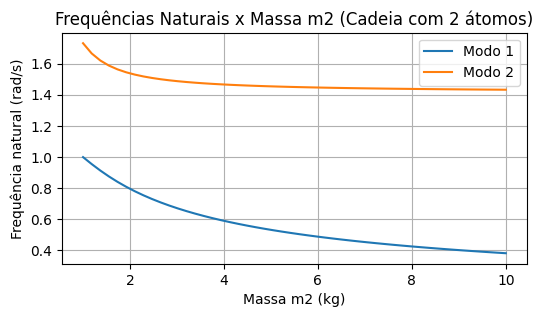

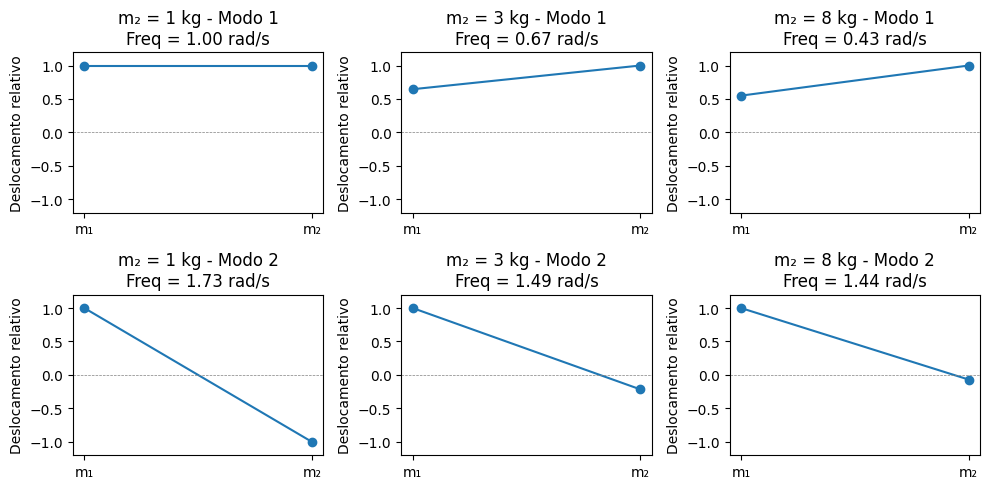

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular frequências naturais e modos normais (autovalores e autovetores)
def vibracao_2m(m1, m2, k):
    M = np.diag([m1, m2]) # Matriz de massa (diagonal)
    K = np.array([[2*k, -k], [-k, 2*k]]) # Matriz de rigidez para sistema periódico com 2 massas
    
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K) #achar autovalores: Kx = λMx

    # Ordenar os valores para facilitar análise
    idx = np.argsort(eigvals)
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    freq = np.sqrt(eigvals) # Frequências naturais (raiz quadrada dos autovalores)
    return freq, eigvecs

# Parâmetros
k = 1  # Constante da mola (N/m)
m1 = 1  # kg

# Variação de m2
m2_values = np.linspace(1, 10, 50)
frequencias = []

# Calcular frequências para cada m2
for m2 in m2_values:
    freq, _ = vibracao_2m(m1, m2, k)
    frequencias.append(freq)

frequencias = np.array(frequencias)

# Plotando gráfico das frequências naturais em função de m2
plt.figure(figsize=(6, 3))
plt.plot(m2_values, frequencias[:, 0], label='Modo 1')
plt.plot(m2_values, frequencias[:, 1], label='Modo 2')
plt.xlabel('Massa m2 (kg)')
plt.ylabel('Frequência natural (rad/s)')
plt.title('Frequências Naturais x Massa m2 (Cadeia com 2 átomos)')
plt.legend()
plt.grid(True)
plt.show()

# Visualizar os modos normais para alguns valores de m2
m2_testes = [1, 3, 8]  #valores diferentes de m2 para comparação

plt.figure(figsize=(10, 5))

for i, m2 in enumerate(m2_testes):
    freq, modos = vibracao_2m(m1, m2, k)
    for j in range(2):  # Dois modos
        plt.subplot(2, 3, i + 1 + j*3)
        desloc = modos[:, j]
        
        # Normaliza para melhor visualização
        desloc = desloc / np.max(np.abs(desloc))
        
        plt.plot([1, 2], desloc, marker='o', linestyle='-')
        plt.title(f"m₂ = {m2} kg - Modo {j+1}\nFreq = {freq[j]:.2f} rad/s")
        plt.xticks([1, 2], ['m₁', 'm₂'])
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.ylim(-1.2, 1.2)
        plt.ylabel("Deslocamento relativo")

plt.tight_layout()
plt.show()

Na cadeia periódica com duas massas conectadas por molas, as **frequências naturais de vibração** dependem diretamente da razão entre as massas.

Quando $m_1 = m_2$, o sistema é simétrico. Os dois modos vibracionais são:

  - Um com movimento em fase (modo de translação).
  - Outro com movimento fora de fase (modo de vibração real).

Quando $m_2$ aumenta, o sistema perde simetria:

  - O modo de menor frequência (em fase) diminui, pois o sistema tende a se mover como um bloco pesado.
  - O modo de maior frequência (fora de fase) aumenta levemente ou se mantém, pois o átomo mais leve oscila mais rapidamente.

Os **modos normais (autovetores)** mostram isso visualmente:

  - Quando as massas são diferentes, o átomo mais leve tende a vibrar com amplitude maior no modo mais energético.

Ou seja, a diferença entre as massas desequilibra a participação de cada átomo nos modos de vibração, afetando tanto as frequências quanto a forma dos autovetores.

## Exercício 02
![alt text](q2.png)

![alt text](fluxograma_q2.png)

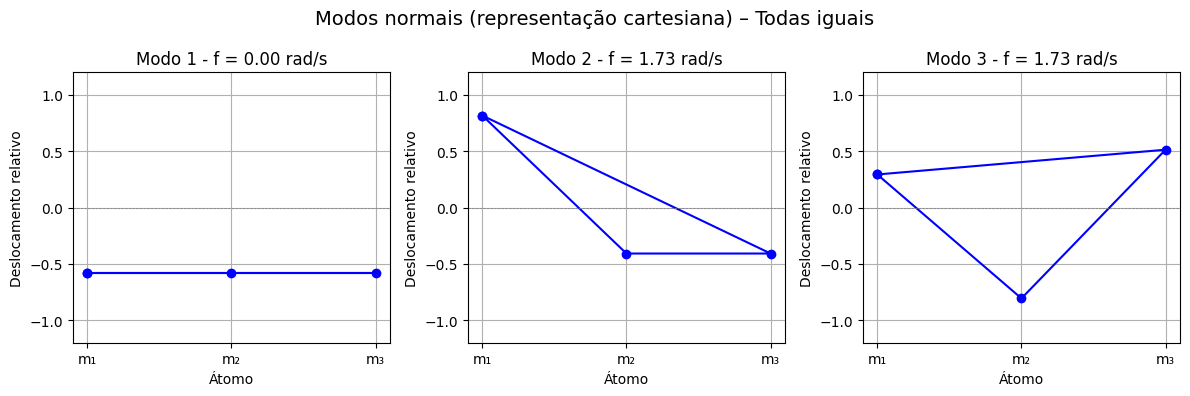

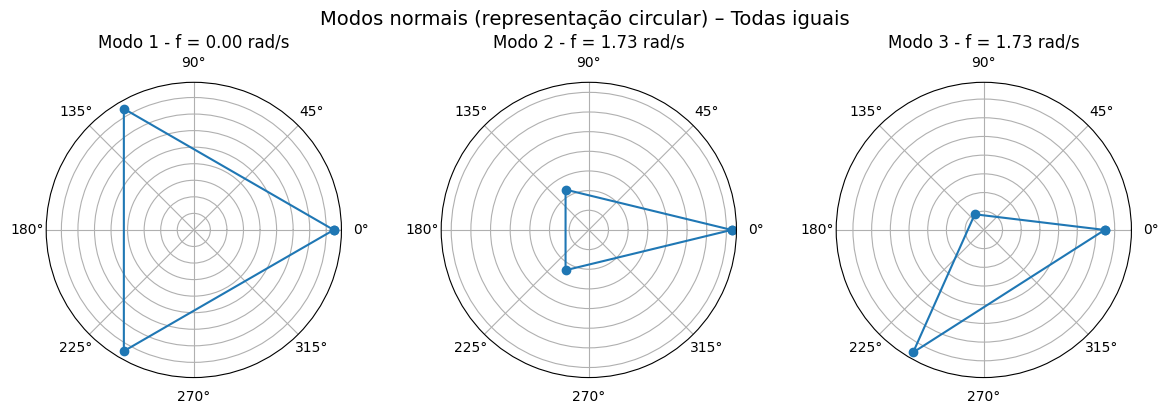

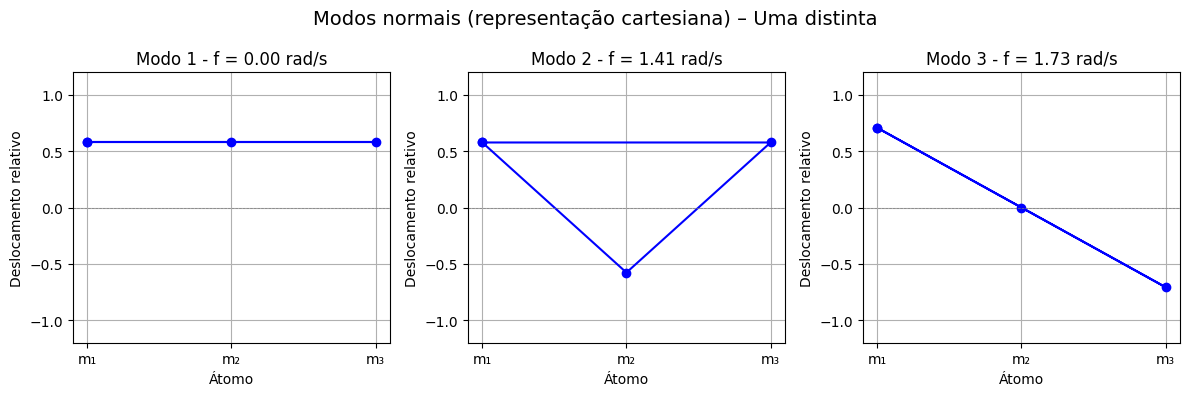

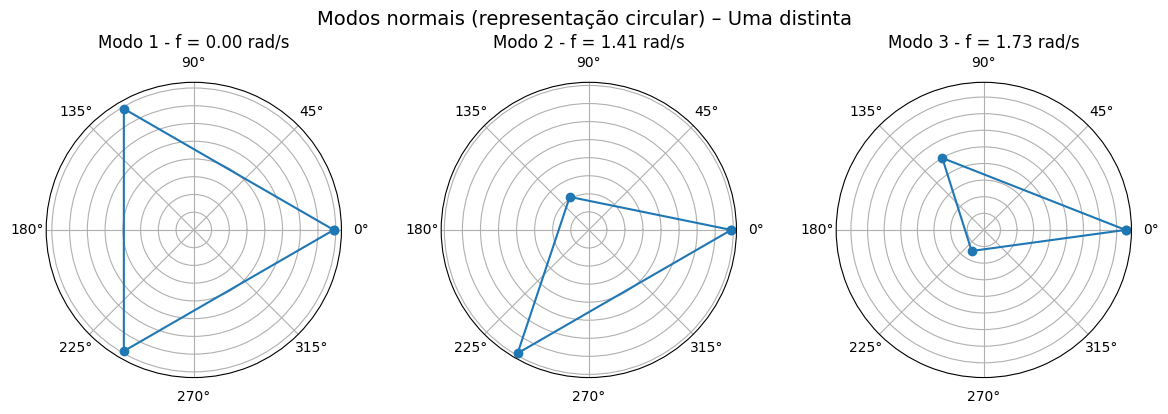

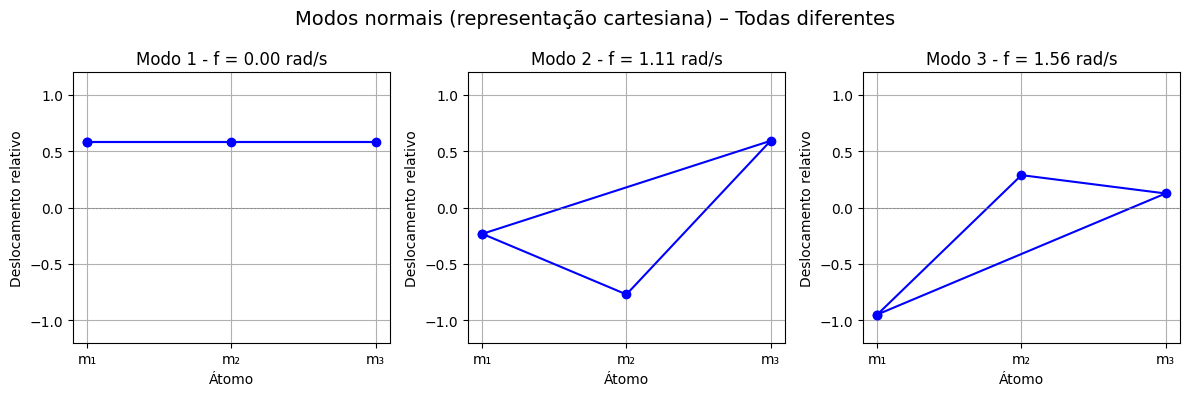

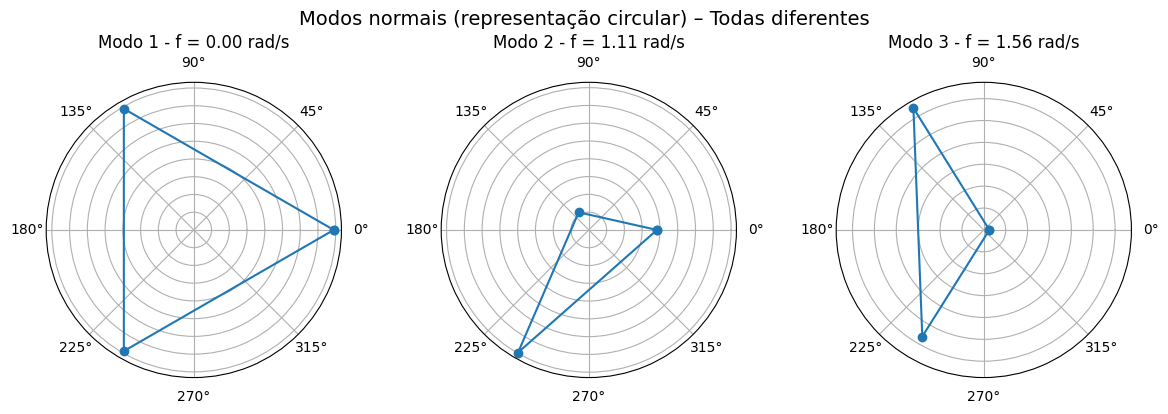

In [25]:
# Coordenadas angulares (para o gráfico polar)
theta = np.array([0, 2*np.pi/3, 4*np.pi/3])

# Função para calcular frequências e modos normais
def vibracao_3m_ciclica(m1, m2, m3, k):
    M = np.diag([m1, m2, m3]) # Matriz de massas (diagonal, pois sem acoplamento direto)
    K = np.array([
        [ 2*k, -k , -k ],
        [-k ,  2*k, -k ],
        [-k , -k ,  2*k]
    ])  # Matriz de rigidez com ligações cíclicas m1-m2, m2-m3, m3-m1

    # achar autovalores: (K - w²M)v = 0
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)

    # Ordena autovalores e autovetores
    idx = np.argsort(eigvals)
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Frequência natural = raiz quadrada do autovalor
    eigvals = np.clip(eigvals, 0, None)  # Corrige negativos pequenos para 0
    freq = np.sqrt(eigvals)

    return freq, eigvecs

# Função para plotar modos normais no gráfico cartesiano
def plot_cartesiano(freq, modos, label):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f'Modos normais (representação cartesiana) – {label}', fontsize=14)

    for j in range(3):
        deslocamento = modos[:, j]
        
        # Cria vetor fechado m1 → m2 → m3 → m1
        x = np.array([1, 2, 3, 1])
        y = np.append(deslocamento, deslocamento[0])

        axs[j].plot(x, y, marker='o', linestyle='-', color='b')
        axs[j].set_title(f'Modo {j+1} - f = {freq[j]:.2f} rad/s')
        axs[j].set_xticks([1, 2, 3])
        axs[j].set_xticklabels(['m₁', 'm₂', 'm₃'])
        axs[j].set_xlabel('Átomo')
        axs[j].set_ylabel('Deslocamento relativo')
        axs[j].axhline(0, color='gray', linestyle='--', linewidth=0.5)
        axs[j].set_ylim(-1.2, 1.2)
        axs[j].grid(True)

    plt.tight_layout()
    plt.show()

# Função para plotar modos normais em gráfico circular (polar)
def plot_circular(freq, modos, label):
    fig, axs = plt.subplots(1, 3, subplot_kw={'projection': 'polar'}, figsize=(12, 4))
    fig.suptitle(f'Modos normais (representação circular) – {label}', fontsize=14)

    for j in range(3):
        deslocamento = modos[:, j]
        r = 1 + deslocamento  # raio base + deslocamento

        # Fecha o ciclo (liga m3 com m1 visualmente)
        r = np.append(r, r[0])
        th = np.append(theta, theta[0])

        axs[j].plot(th, r, marker='o')
        axs[j].set_title(f'Modo {j+1} - f = {freq[j]:.2f} rad/s')
        axs[j].set_yticklabels([])
        axs[j].grid(True)

    plt.tight_layout()
    plt.show()

# Casos com diferentes combinações de massa
casos = {
    "Todas iguais": (1, 1, 1),
    "Uma distinta": (1, 2, 1),
    "Todas diferentes": (1, 2, 3)}

# Executa para cartesiano e polar
for label, (m1, m2, m3) in casos.items():
    freq, modos = vibracao_3m_ciclica(m1, m2, m3, k)
    plot_cartesiano(freq, modos, label)
    plot_circular(freq, modos, label)

## Exercício 03
![alt text](q3.png)

![alt text](fluxograma_q3.png)

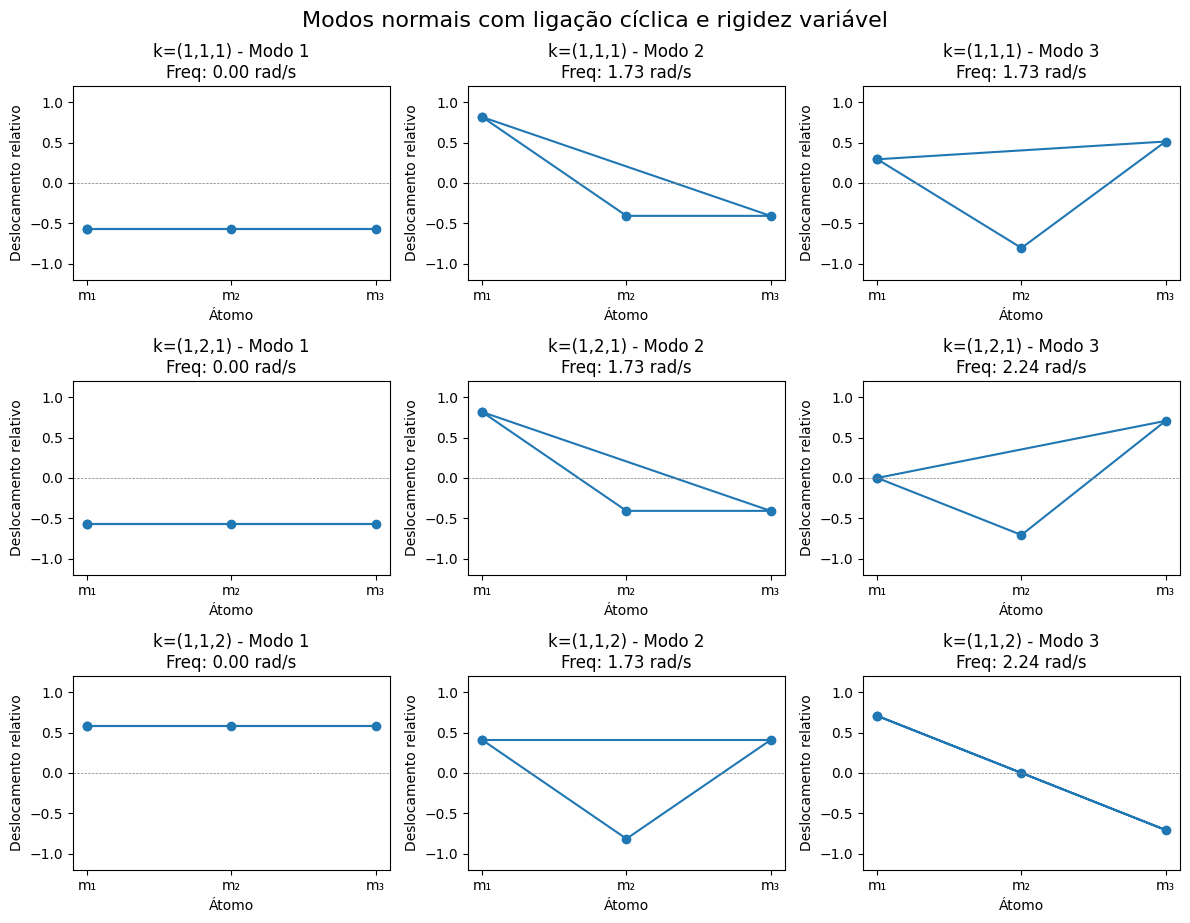

In [29]:
# Função para resolver vibração com rigidez variável e conexão cíclica
def vibracao_k_variavel(m1, m2, m3, k1, k2, k3):
    M = np.diag([m1, m2, m3])
    K = np.array([
        [k1 + k3, -k1, -k3],
        [-k1, k1 + k2, -k2],
        [-k3, -k2, k2 + k3]
    ])
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)
    idx = np.argsort(eigvals)
    eigvals = np.clip(eigvals[idx], 0, None)
    eigvecs = eigvecs[:, idx]
    freq = np.sqrt(eigvals)
    return freq, eigvecs

m1 = m2 = m3 = 1 #massas fixas

# Casos de rigidez (mantendo conexão cíclica)
r = [
    (1, 1, 1),
    (1, 2, 1),
    (1, 1, 2)]

# Gráficos
plt.figure(figsize=(12, 9))
for i, (k1, k2, k3) in enumerate(r):
    freq, modos = vibracao_k_variavel(m1, m2, m3, k1, k2, k3)

    for j in range(3):
        plt.subplot(3, 3, 3*i + j + 1)
        
        # x fictício para representar posições m1 → m2 → m3 → m1
        x = [1, 2, 3, 1]
        y = list(modos[:, j]) + [modos[0, j]]  # fechar o ciclo: m1 → m2 → m3 → m1
        
        plt.plot(x, y, marker='o', linestyle='-')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.ylim(-1.2, 1.2)
        plt.title(f'k=({k1},{k2},{k3}) - Modo {j+1}\nFreq: {freq[j]:.2f} rad/s')
        plt.xticks([1, 2, 3], ['m₁', 'm₂', 'm₃'])
        plt.xlabel('Átomo')
        plt.ylabel('Deslocamento relativo')

plt.tight_layout()
plt.suptitle('Modos normais com ligação cíclica e rigidez variável', fontsize=16, y=1.02)
plt.show()

#### Sistema com 2 massas cíclico:

- Possui 2 modos normais: um com frequências iguais (se massas iguais), outro afetado fortemente se $m_{2}$ varia.
- Modo de translação pura não aparece exatamente como frequência zero, mas a simetria faz surgir um modo com frequência mais baixa.

#### Sistema com 3 massas cíclico:

- Sempre apresenta um modo com frequência zero (modo de translação do conjunto).
- Com variação de $k_{1}$, $k_{2}$, $k_{3}$, ou $m_{2}$, os dois outros modos se ajustam de forma mais sensível, especialmente se há quebra de simetria.

#### Análise do Comportamento Vibracional

A variação das constantes de mola afeta significativamente os padrões vibracionais. Em um sistema cíclico com três massas, vemos que:

 1. A distribuição de rigidez (valores diferentes de $k_{1}$, $k_{2}$, $k_{3}$,) muda o equilíbrio entre os modos, levando a deslocamentos mais concentrados em alguns átomos.
 2. A simetria dos modos é quebrada, fazendo com que alguns modos se tornem assimétricos, mesmo com massas iguais.
 3. Quando comparado ao sistema com apenas 2 massas, o sistema de 3 massas revela mais riqueza modal, inclusive um modo com frequência zero, representando a translação rígida do conjunto.

> ### Breve relatório (até 300 palavras) interpretando:

- A influência da simetria e variação de massas nas frequências

- A mudança nas formas dos modos normais

As frequências naturais e os modos normais das cadeias atômicas são fortemente influenciados pela simetria do sistema e pelas variações nas massas dos átomos e nas constantes das molas. Na cadeia com 2 átomos, quando as massas são iguais, os modos normais apresentam simetria perfeita, com um modo de translação (frequência próxima de zero) e outro modo vibratório oposto. Ao aumentar a diferença entre as massas, os modos tornam-se mais distintos: um modo tende a uma frequência muito baixa, quase estacionária, enquanto o outro concentra a vibração na massa mais leve, refletindo o desequilíbrio dinâmico do sistema.

Para a cadeia cíclica com 3 átomos, a simetria dos modos normais é mais complexa. Com massas iguais, os modos são simétricos e refletem padrões típicos de redes cristalinas periódicas. A introdução de massas diferentes quebra essa simetria, gerando modos assimétricos onde as amplitudes de vibração se concentram preferencialmente nos átomos mais leves, evidenciando a influência local das perturbações.

A variação das constantes das molas ($k_{1}$, $k_{2}$, $k_{3}$,) altera diretamente as frequências e os modos normais. Molas mais rígidas elevam as frequências dos modos que envolvem maior deformação nessas ligações, enquanto rigidezes desiguais modificam os padrões vibracionais, destacando o movimento relativo entre átomos. Essa sensibilidade mostra como a distribuição local de rigidez molda a dinâmica da cadeia.